In [1]:
from sklearn.model_selection import StratifiedGroupKFold
X = list(range(18))
y = [1] * 6 + [0] * 12
groups = [1, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 4, 5, 5, 5, 6, 6, 6]
sgkf = StratifiedGroupKFold(n_splits=3)
for train, test in sgkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[ 0  2  3  4  5  6  7 10 11 15 16 17] [ 1  8  9 12 13 14]
[ 0  1  4  5  6  7  8  9 11 12 13 14] [ 2  3 10 15 16 17]
[ 1  2  3  8  9 10 12 13 14 15 16 17] [ 0  4  5  6  7 11]


In [21]:
from sklearn.model_selection import StratifiedGroupKFold
X = list(range(18))
y = ["oak","oak","oak","pine","pine","pine","oak","oak","oak","pine","pine","pine","oak","oak","oak","pine","pine","pine"]
groups = ["s1","s1","s1","s2","s2","s2","s3","s3","s3","s4","s4","s4","s5","s5","s5","s6","s6","s6"]
sgkf = StratifiedGroupKFold(n_splits=2)
for train, test in sgkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[ 3  4  5  6  7  8 15 16 17] [ 0  1  2  9 10 11 12 13 14]
[ 0  1  2  9 10 11 12 13 14] [ 3  4  5  6  7  8 15 16 17]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from sklearn.model_selection import (
        GroupKFold,
        GroupShuffleSplit,
        KFold,
        ShuffleSplit,
        StratifiedGroupKFold,
        StratifiedKFold,
        StratifiedShuffleSplit,
        TimeSeriesSplit,
    )
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

In [ ]:
pfts = 
shapeIDs = 

y = [list(set(pfts)).index(pft) for pft in pfts ] 
X = list(range(len(pfts)))
groups = [list(set(shapeIDs)).index(shapeID) for shapeID in shapeIDs]  

sgkf = StratifiedGroupKFold(n_splits = n_splits) #ais make n_splits a global param 
for train, test in sgkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))
# ais need to put this code ^ into a for-loop to choose best hyperparameters

# cvs = [StratifiedKFold, GroupKFold, StratifiedGroupKFold]

# for cv in cvs:
fig, ax = plt.subplots(figsize=(6, 3))
plot_cv_indices(StratifiedGroupKFold(n_splits), X, y, groups, ax, n_splits, cmap_data, cmap_cv)
ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
    ["Testing set", "Training set"],
    loc=(1.02, 0.8),
)
# Make the legend fit
plt.tight_layout()
fig.subplots_adjust(right=0.7)

The code below separates each set of initial conditions into burned and unburned. 

    input: shapefiles for inventory plots and random plots as well as the fire perimeter
    
    output: for each initialization type, create burned and unburned css/pss files

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import pandas as pd

# Load the shapefiles
plots = gpd.read_file('/pscratch/sd/a/aspiers/data/intermediate/SOAP/2021/inventory_plots/plots.shp')
random_plots = gpd.read_file('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_random_plots/ic_type_plots.shp')
fire_perim_raw = gpd.read_file('/global/homes/a/aspiers/dev/PRISMATIC/notebooks/2020_CreekFire_Perimeter_EPSG4326.shp')
fire_perim = fire_perim_raw.to_crs(epsg=32611)

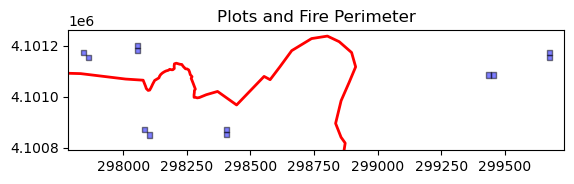

In [33]:
# Plot plots and fire_perim together
fig, ax = plt.subplots()
fire_perim.plot(ax=ax, color='none', edgecolor='red', linewidth=2, label='Fire Perimeter')
plots.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Plots')
ax.set_xlim(plots.total_bounds[0]-50, plots.total_bounds[2]+50)
ax.set_ylim(plots.total_bounds[1]-50, plots.total_bounds[3]+50)
plt.title('Plots and Fire Perimeter')
# plt.savefig('plots_and_fire_perim.png')
plt.show()

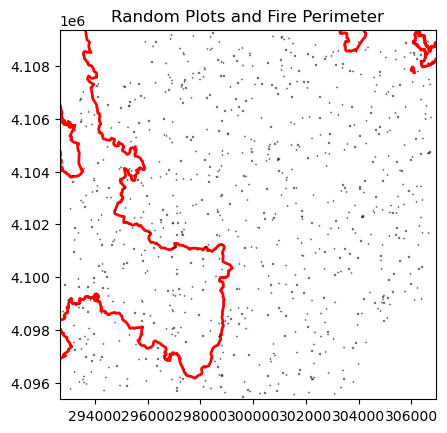

In [44]:
# # Plot random_plots and fire_perim together
fig, ax = plt.subplots()
fire_perim.plot(ax=ax, color='none', edgecolor='red', linewidth=2, label='Fire Perimeter')
random_plots.plot(ax=ax, color='green', edgecolor='black', alpha=0.5, label='Random Plots')
ax.set_xlim(random_plots.total_bounds[0]-100, random_plots.total_bounds[2]+100)
ax.set_ylim(random_plots.total_bounds[1]-100, random_plots.total_bounds[3]+100)
plt.title('Random Plots and Fire Perimeter')
# plt.savefig('random_plots_and_fire_perim.png')
plt.show()

In [ ]:
# Separate plots into burned and unburned
plots_burned = plots[plots.apply(lambda row: fire_perim.contains(row.geometry).any(), axis=1)]
# plots_unburned = plots[~plots.index.isin(plots_burned.index)]

# # Save burned and unburned plots to shapefiles
# plots_burned.to_file('plots_burned.shp')
# plots_unburned.to_file('plots_unburned.shp')

# # Separate random_plots into burned and unburned
random_plots_burned = random_plots[random_plots.apply(lambda row: fire_perim.contains(row.geometry).any(), axis=1)]
# random_plots_unburned = random_plots[~random_plots.index.isin(random_plots_burned.index)]

# # Save burned and unburned random_plots to shapefiles
# random_plots_burned.to_file('random_plots_burned.shp')
# random_plots_unburned.to_file('random_plots_unburned.shp')

In [50]:
random_plots_burned

,PLOTID,subplotID,geometry
0,1,1,"POLYGON ((293589.069 4102665.188, 293589.069 4..."
1,2,1,"POLYGON ((296073.951 4098523.267, 296073.951 4..."
4,5,1,"POLYGON ((295969.488 4100230.314, 295969.488 4..."
6,7,1,"POLYGON ((293178.483 4100966.331, 293178.483 4..."
7,8,1,"POLYGON ((294101.193 4102182.097, 294101.193 4..."
...,...,...,...
980,981,1,"POLYGON ((298351.084 4097969.592, 298351.084 4..."
982,983,1,"POLYGON ((294077.725 4103469.959, 294077.725 4..."
987,988,1,"POLYGON ((296688.483 4098041.903, 296688.483 4..."
991,992,1,"POLYGON ((297221.741 4097639.158, 297221.741 4..."


In [51]:
plots_burned

,plotID,subplotID,geometry
2,SOAP_046_23_400,23_400,"POLYGON ((298394.700 4100840.786, 298394.700 4..."
3,SOAP_046_41_400,41_400,"POLYGON ((298394.700 4100860.786, 298394.700 4..."
6,SOAP_052_23_400,23_400,"POLYGON ((298094.350 4100839.396, 298094.350 4..."
7,SOAP_052_39_400,39_400,"POLYGON ((298074.350 4100859.396, 298074.350 4..."


for each ic_type, load in the cohort and patch files and separate into new files, saving the burned plots in one css/pss and unburned plots in another css/pss

In [ ]:
# ic_type == field_inv

field_inv_css = pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/field_inv_plots/ic.css", sep="\s+") 
field_inv_pss = pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/field_inv_plots/ic.pss", sep="\s+") 

# # Identify which values in the column 'patch' match values in the shapefile column 'plotID'
field_inv_css_burned   = field_inv_css[field_inv_css['patch'].isin(plots_burned['plotID'])]
field_inv_css_unburned = field_inv_css[~field_inv_css['patch'].isin(plots_burned['plotID'])]

field_inv_pss_burned   = field_inv_pss[field_inv_pss['patch'].isin(plots_burned['plotID'])]
field_inv_pss_unburned = field_inv_pss[~field_inv_pss['patch'].isin(plots_burned['plotID'])]

# Make sure pss files area column must sum to 1
field_inv_pss_burned['area']   = field_inv_pss_burned['area']   / field_inv_pss_burned['area'].sum()
field_inv_pss_unburned['area'] = field_inv_pss_unburned['area'] / field_inv_pss_unburned['area'].sum()

# Save the new burned and unburned files
field_inv_css_burned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/field_inv_plots/ic_burned.css', index=False, sep='\t')
field_inv_css_unburned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/field_inv_plots/ic_unburned.css', index=False, sep='\t')

field_inv_pss_burned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/field_inv_plots/ic_burned.pss', index=False, sep='\t')
field_inv_pss_unburned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/field_inv_plots/ic_unburned.pss', index=False, sep='\t')


/tmp/ipykernel_1892912/2140116614.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_inv_pss_burned['area']   = field_inv_pss_burned['area']   / field_inv_pss_burned['area'].sum()
/tmp/ipykernel_1892912/2140116614.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_inv_pss_unburned['area'] = field_inv_pss_unburned['area'] / field_inv_pss_unburned['area'].sum()


In [84]:
# ic_type == rs_inv

rs_inv_css = pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_inv_plots/ic_rs_inv_plots.css", sep="\s+") 
rs_inv_pss = pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_inv_plots/ic_rs_inv_plots.pss", sep="\s+") 

# # Identify which values in the column 'patch' match values in the shapefile column 'plotID'
rs_inv_css_burned   = rs_inv_css[rs_inv_css['patch'].isin(plots_burned['plotID'])]
rs_inv_css_unburned = rs_inv_css[~rs_inv_css['patch'].isin(plots_burned['plotID'])]

rs_inv_pss_burned   = rs_inv_pss[rs_inv_pss['patch'].isin(plots_burned['plotID'])]
rs_inv_pss_unburned = rs_inv_pss[~rs_inv_pss['patch'].isin(plots_burned['plotID'])]

# Make sure pss files area column must sum to 1
rs_inv_pss_burned['area']   = rs_inv_pss_burned['area']   / rs_inv_pss_burned['area'].sum()
rs_inv_pss_unburned['area'] = rs_inv_pss_unburned['area'] / rs_inv_pss_unburned['area'].sum()

# Save the new burned and unburned files
rs_inv_css_burned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_inv_plots/ic_rs_inv_plots_burned.css', index=False, sep='\t')
rs_inv_css_unburned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_inv_plots/ic_rs_inv_plots_unburned.css', index=False, sep='\t')

rs_inv_pss_burned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_inv_plots/ic_rs_inv_plots_burned.pss', index=False, sep='\t')
rs_inv_pss_unburned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_inv_plots/ic_rs_inv_plots_unburned.pss', index=False, sep='\t')


/tmp/ipykernel_1892912/1892213174.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs_inv_pss_burned['area']   = rs_inv_pss_burned['area']   / rs_inv_pss_burned['area'].sum()
/tmp/ipykernel_1892912/1892213174.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs_inv_pss_unburned['area'] = rs_inv_pss_unburned['area'] / rs_inv_pss_unburned['area'].sum()


In [87]:
# ic_type == rs_random

rs_random_css = pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_random_plots/ic_rs_random_plots.css", sep="\s+") 
rs_random_pss = pd.read_csv("/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_random_plots/ic_rs_random_plots.pss", sep="\s+") 

# # Identify which values in the column 'patch' match values in the shapefile column 'plotID'
rs_random_css_burned   = rs_random_css[rs_random_css['patch'].isin(random_plots_burned['PLOTID'])]
rs_random_css_unburned = rs_random_css[~rs_random_css['patch'].isin(random_plots_burned['PLOTID'])]

rs_random_pss_burned   = rs_random_pss[rs_random_pss['patch'].isin(random_plots_burned['PLOTID'])]
rs_random_pss_unburned = rs_random_pss[~rs_random_pss['patch'].isin(random_plots_burned['PLOTID'])]

# Make sure pss files area column must sum to 1
rs_random_pss_burned['area']   = rs_random_pss_burned['area']   / rs_random_pss_burned['area'].sum()
rs_random_pss_unburned['area'] = rs_random_pss_unburned['area'] / rs_random_pss_unburned['area'].sum()

# Save the new burned and unburned files
rs_random_css_burned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_random_plots/ic_rs_random_plots_burned.css', index=False, sep='\t')
rs_random_css_unburned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_random_plots/ic_rs_random_plots_unburned.css', index=False, sep='\t')

rs_random_pss_burned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_random_plots/ic_rs_random_plots_burned.pss', index=False, sep='\t')
rs_random_pss_unburned.to_csv('/pscratch/sd/a/aspiers/data/final/SOAP/2021/rs_random_plots/ic_rs_random_plots_unburned.pss', index=False, sep='\t')


/tmp/ipykernel_1892912/2231318682.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs_random_pss_burned['area']   = rs_random_pss_burned['area']   / rs_random_pss_burned['area'].sum()
/tmp/ipykernel_1892912/2231318682.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs_random_pss_unburned['area'] = rs_random_pss_unburned['area'] / rs_random_pss_unburned['area'].sum()
